In [16]:
import sys
sys.path.append('src/')
from DataHandler import shuffle
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('dataset/wine_dataset.csv')

In [18]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093,0.994828,0.994828,0.184518,0.029710,0.177790
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441,-0.156621,-0.156621,-0.215364,0.053302,-0.044542
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129,0.628252,0.628252,0.326059,0.067317,0.241498
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160,0.117474,0.117474,0.018509,0.050021,0.993575
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494,0.102184,0.102184,0.572840,0.081575,0.127109
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757,-0.158242,-0.158242,0.046965,-0.217280,0.177675
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963,-0.107607,-0.107607,0.049530,0.331133,0.204262
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110,0.684886,0.684886,0.180272,0.138697,0.391108
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264,-0.673141,-0.673141,-0.238552,-0.108620,-0.146948
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072,0.159560,0.159560,0.973757,0.055982,0.053761


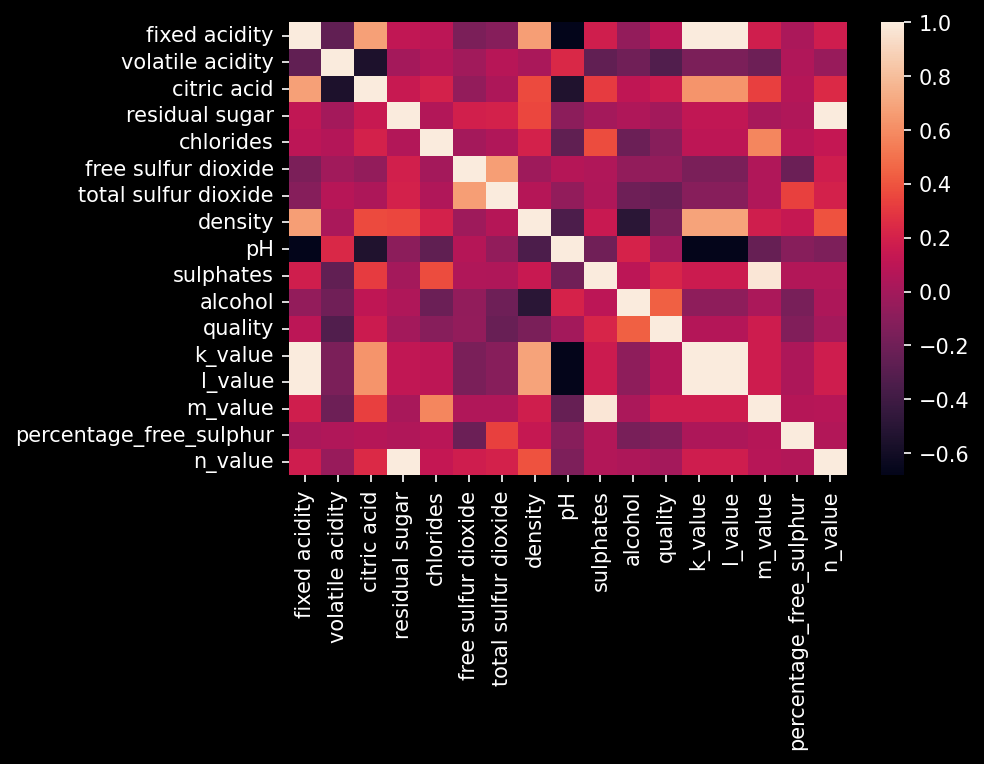

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.style.use('dark_background')
sns.heatmap(df.corr())
plt.show()

In [20]:
df.drop(['l_value'], inplace = True, axis = 1)
data = df.to_numpy()

In [21]:
x,y = data[:,np.arange(data.shape[1])!=11], data[:,11]

In [22]:
from PCA import PCA
pca = PCA(11)
x = pca.fit_transform(x)
pca.explain_variance

Variance Covered : 0.9949115063701033
Fraction Variance : [0.28147967 0.15232509 0.1398806  0.11240095 0.0883909  0.07279181
 0.04753319 0.04584504 0.02960593 0.01587256 0.00878578]


In [23]:
x,y = shuffle(x,y)
n = x.shape[0]
m = (n*8)//10
train_x, train_y = x[:m], y[:m]
test_x, test_y = x[m:], y[m:]

In [24]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(32,))
clf.fit(train_x, train_y)
pred_y_1 = clf.predict(test_x)
print(np.sum(pred_y_1 == test_y)/pred_y_1.size)

0.765625


/home/cmaspi/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# from LogisticRegression import logisticRegression
# clf = logisticRegression()
# clf.fit(train_x, train_y, epochs = 5000, lr = 1e-4 )
# pred_y_2 = clf.predict(test_x)
# print(np.sum(pred_y_2 == test_y)/pred_y_2.size)

In [26]:
from KNN import KNN
clf = KNN(31)
clf.fit(train_x, train_y)
pred_y_3 = clf.predict(test_x)
print(np.sum(pred_y_3 == test_y)/pred_y_3.size)

0.753125


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)
pred_y_4 = clf.predict(test_x)
print(np.sum(pred_y_4 == test_y)/pred_y_4.size)

0.66875


In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_x, train_y)
pred_y_4 = clf.predict(test_x)
print(np.sum(pred_y_4 == test_y)/pred_y_4.size)

0.790625


In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)
pred = clf.predict(test_x)
print(np.sum(pred == test_y)/pred.size)

0.709375


In [30]:
from DecisionTree import DecisionTree
clf = DecisionTree(criterion = 'entropy')
clf.fit(train_x, train_y)
pred = clf.predict(test_x)
print(np.sum(pred == test_y)/pred.size)

0.715625
